In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 323s 2us/step


In [3]:
# Define the ANN model
def create_ann_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Compile the model
ann_model = create_ann_model()
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_history = ann_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.2769 - loss: 2.0422 - val_accuracy: 0.3752 - val_loss: 1.7395
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3946 - loss: 1.6823 - val_accuracy: 0.4225 - val_loss: 1.6040
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4294 - loss: 1.5985 - val_accuracy: 0.4440 - val_loss: 1.5626
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.4492 - loss: 1.5325 - val_accuracy: 0.4623 - val_loss: 1.5280
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4655 - loss: 1.5041 - val_accuracy: 0.4431 - val_loss: 1.5670
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4777 - loss: 1.4658 - val_accuracy: 0.4715 - val_loss: 1.4909
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4795 - loss: 1.4542 - val_accuracy: 0.4682 - val_loss: 1.4950
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4935 -

In [4]:
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test, y_test, verbose=2)
print(f'ANN Test accuracy: {ann_test_acc:.4f}')


313/313 - 1s - 3ms/step - accuracy: 0.4648 - loss: 1.4896
ANN Test accuracy: 0.4648


In [5]:
# Define the CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Compile the model
cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.3479 - loss: 1.7684 - val_accuracy: 0.5518 - val_loss: 1.2567
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5730 - loss: 1.2092 - val_accuracy: 0.6072 - val_loss: 1.1221
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6367 - loss: 1.0311 - val_accuracy: 0.6359 - val_loss: 1.0291
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6708 - loss: 0.9357 - val_accuracy: 0.6698 - val_loss: 0.9466
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7014 - loss: 0.8476 - val_accuracy: 0.6911 - val_loss: 0.8850
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7277 - loss: 0.7812 - val_accuracy: 0.6982 - val_loss: 0.8743
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7428 - loss: 0.7314 - val_accuracy: 0.7088 - val_loss: 0.8514
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7616 -

In [6]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f'CNN Test accuracy: {cnn_test_acc:.4f}')


313/313 - 2s - 6ms/step - accuracy: 0.7145 - loss: 0.8593
CNN Test accuracy: 0.7145


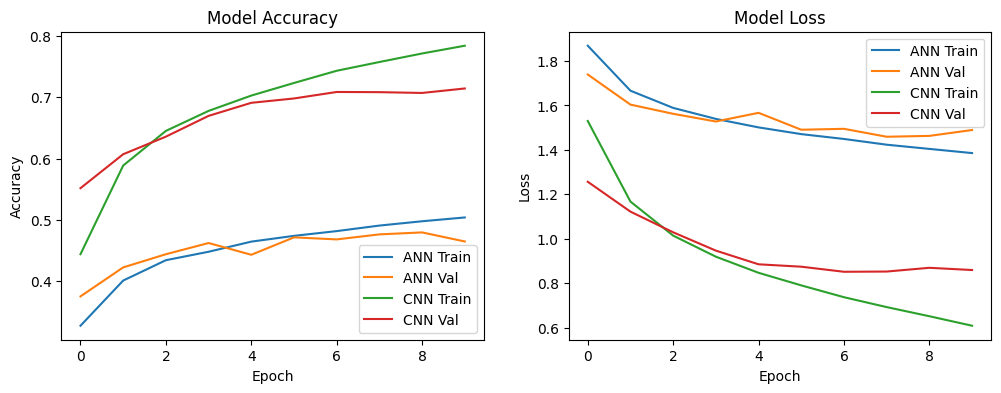

In [7]:
# Plot accuracy
plt.figure(figsize=(12, 4))

# ANN accuracy
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='ANN Train')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val')
plt.plot(cnn_history.history['accuracy'], label='CNN Train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='ANN Train')
plt.plot(ann_history.history['val_loss'], label='ANN Val')
plt.plot(cnn_history.history['loss'], label='CNN Train')
plt.plot(cnn_history.history['val_loss'], label='CNN Val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
